In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from sklearn import *
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
female = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_female = sum(female)/len(female)

print("% of women who survived:", rate_female)

% of women who survived: 0.7420382165605095


In [5]:
males = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_males = sum(males)/len(males)

print("% of men who survived:", rate_males)

% of men who survived: 0.18890814558058924


Below is the original implementation of the tutorial provided in kaggle where the features used are "Pclass", "Sex", "SibSp", "Parch". This results in an accuracy of 77.51% with my leaderboard position being at "7841".

In [6]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


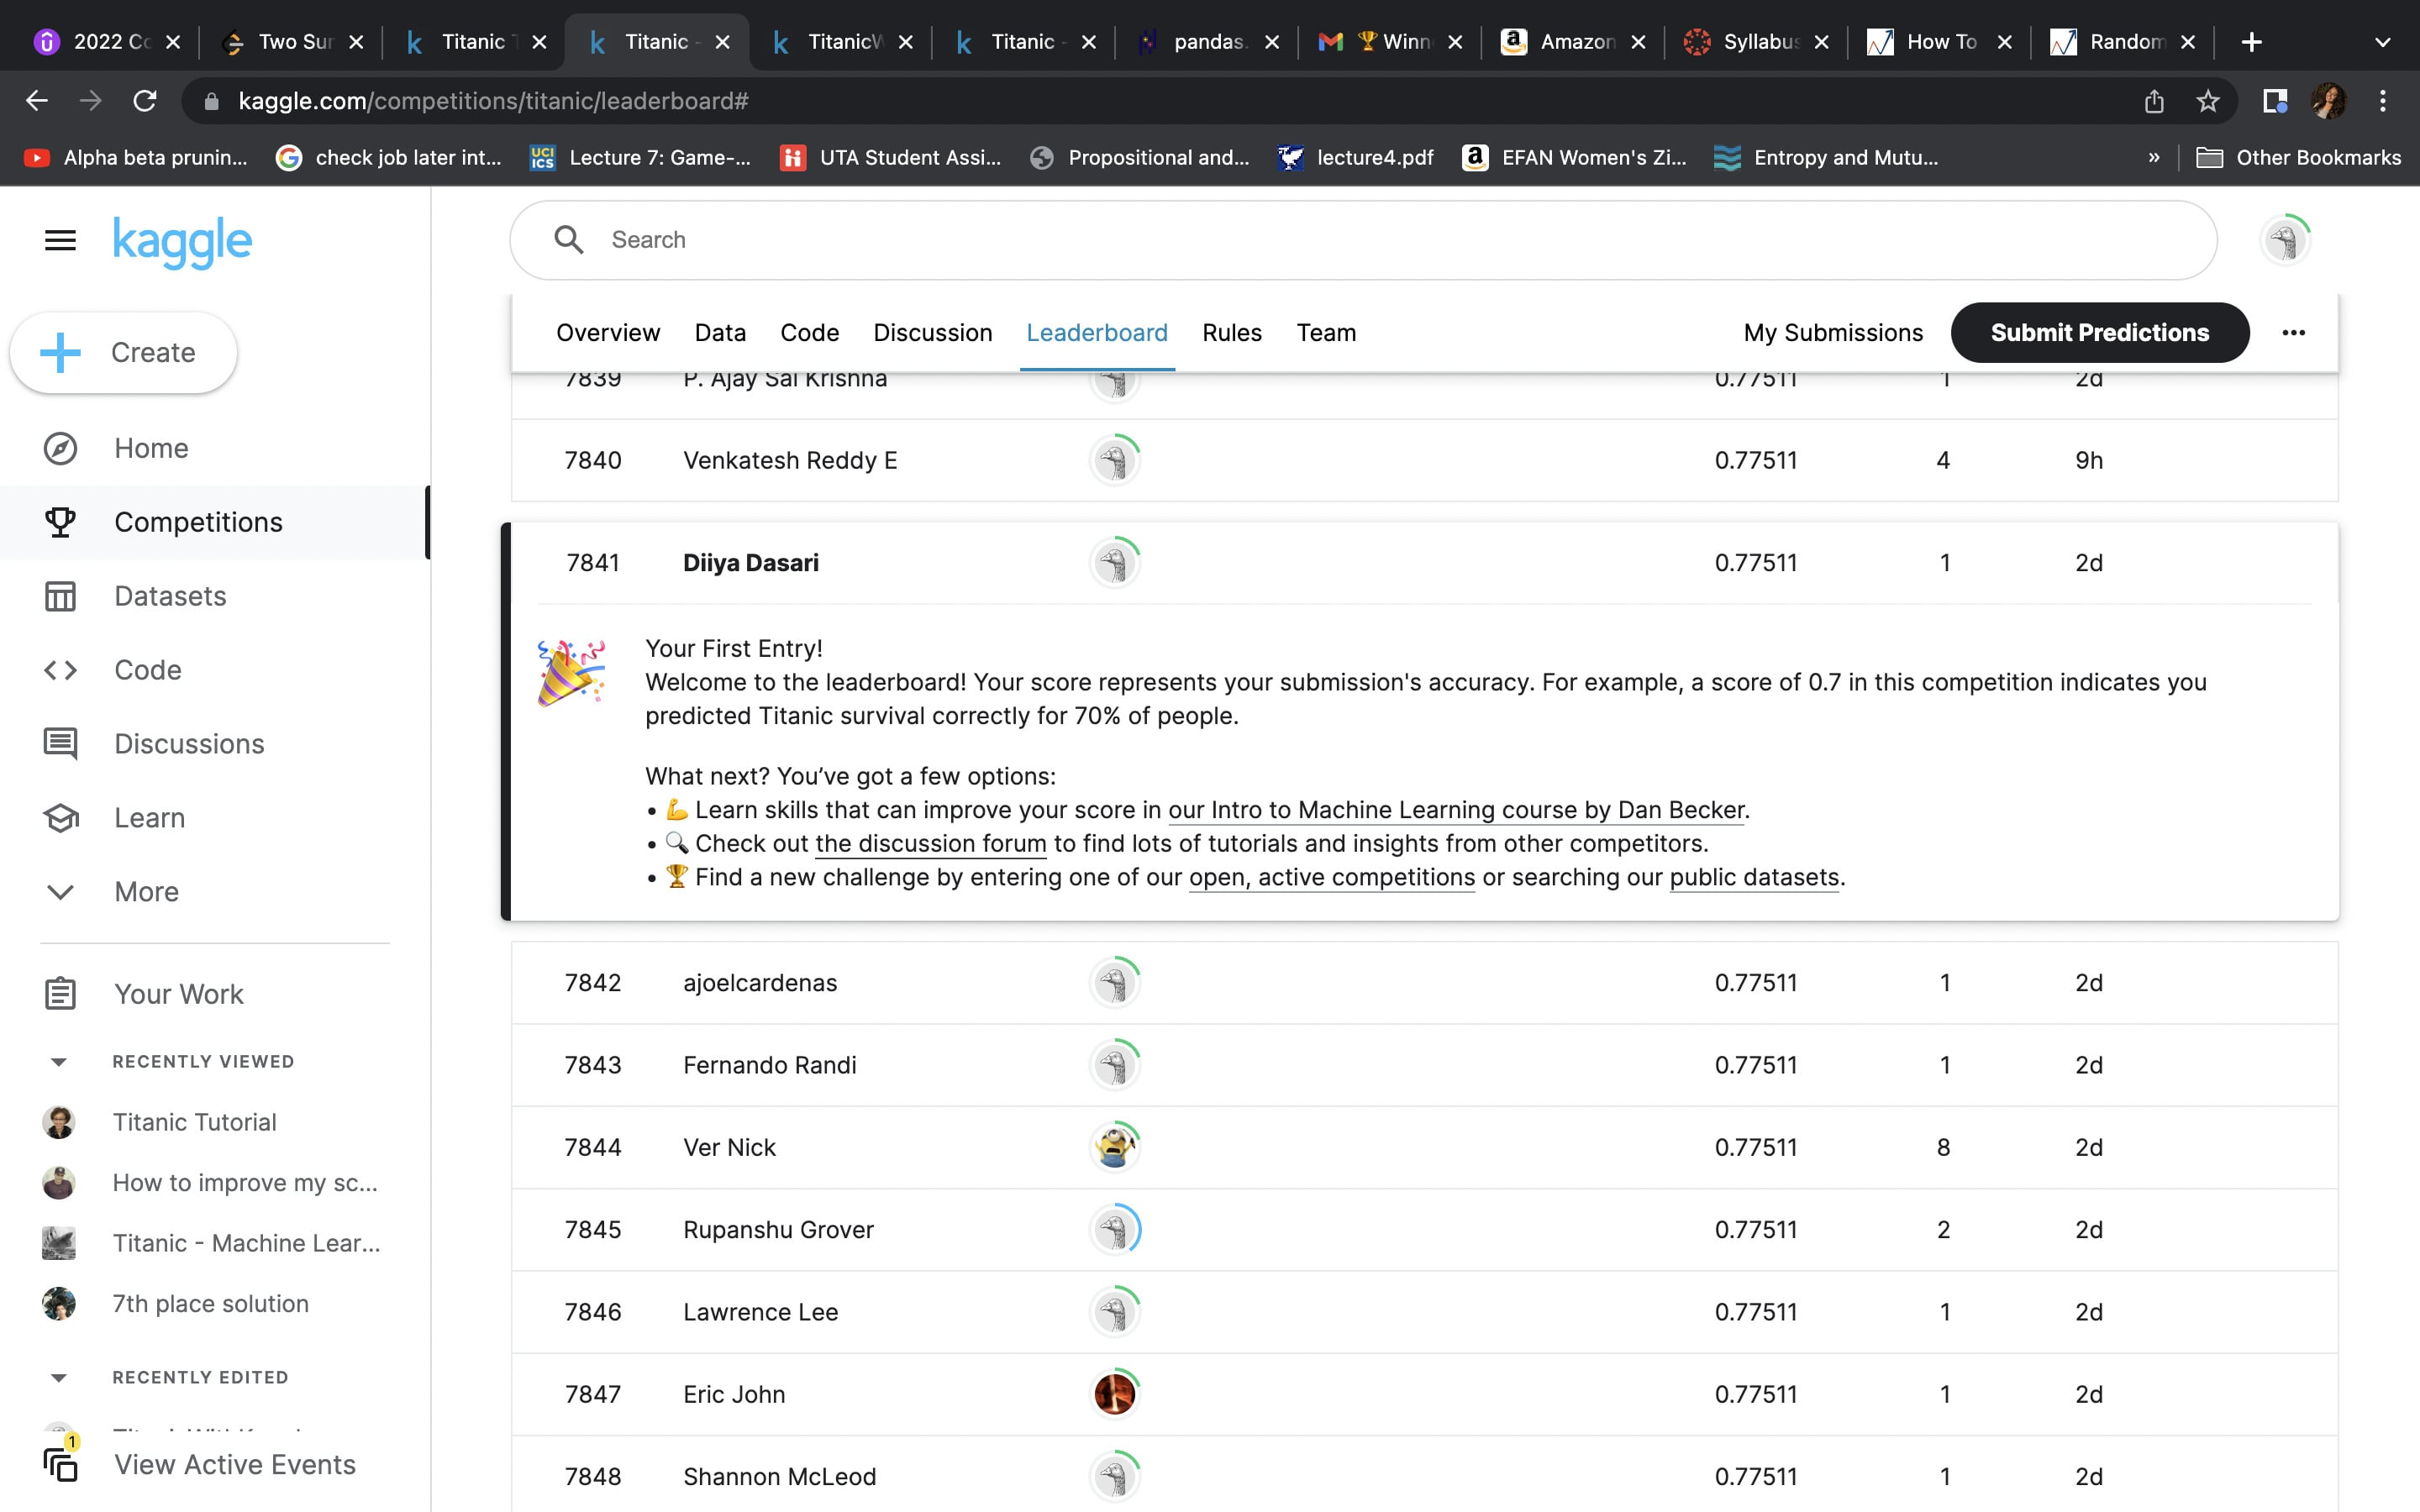

**Contribution : **
There are some issues with the dataset i.e there are a lot of NA and infinite values present in the fields - "Cabin" and "Age". 
Therefore, in the code that follows, I make some changes to the original implementation by experimenting with different combination of features i.e ["Pclass", "Sex", "SibSp", "Parch", "Age"] and by making the NA values as zeroes. This contributes to an accuracy of 77.75% and the leaderboard position is at "3842".

In [7]:
df1 = pd.DataFrame(train_data)
df2 = pd.DataFrame(test_data)

df1.tail()
df2.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
from sklearn.ensemble import RandomForestClassifier

df1 = pd.DataFrame(train_data)
df2 = pd.DataFrame(test_data)
  
# Dropping all the rows with nan values
df1 = df1.fillna(0)
df2 = df2.fillna(0)

y = df1["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(df1[features])
X_test = pd.get_dummies(df2[features])

model = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=4)
model=model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


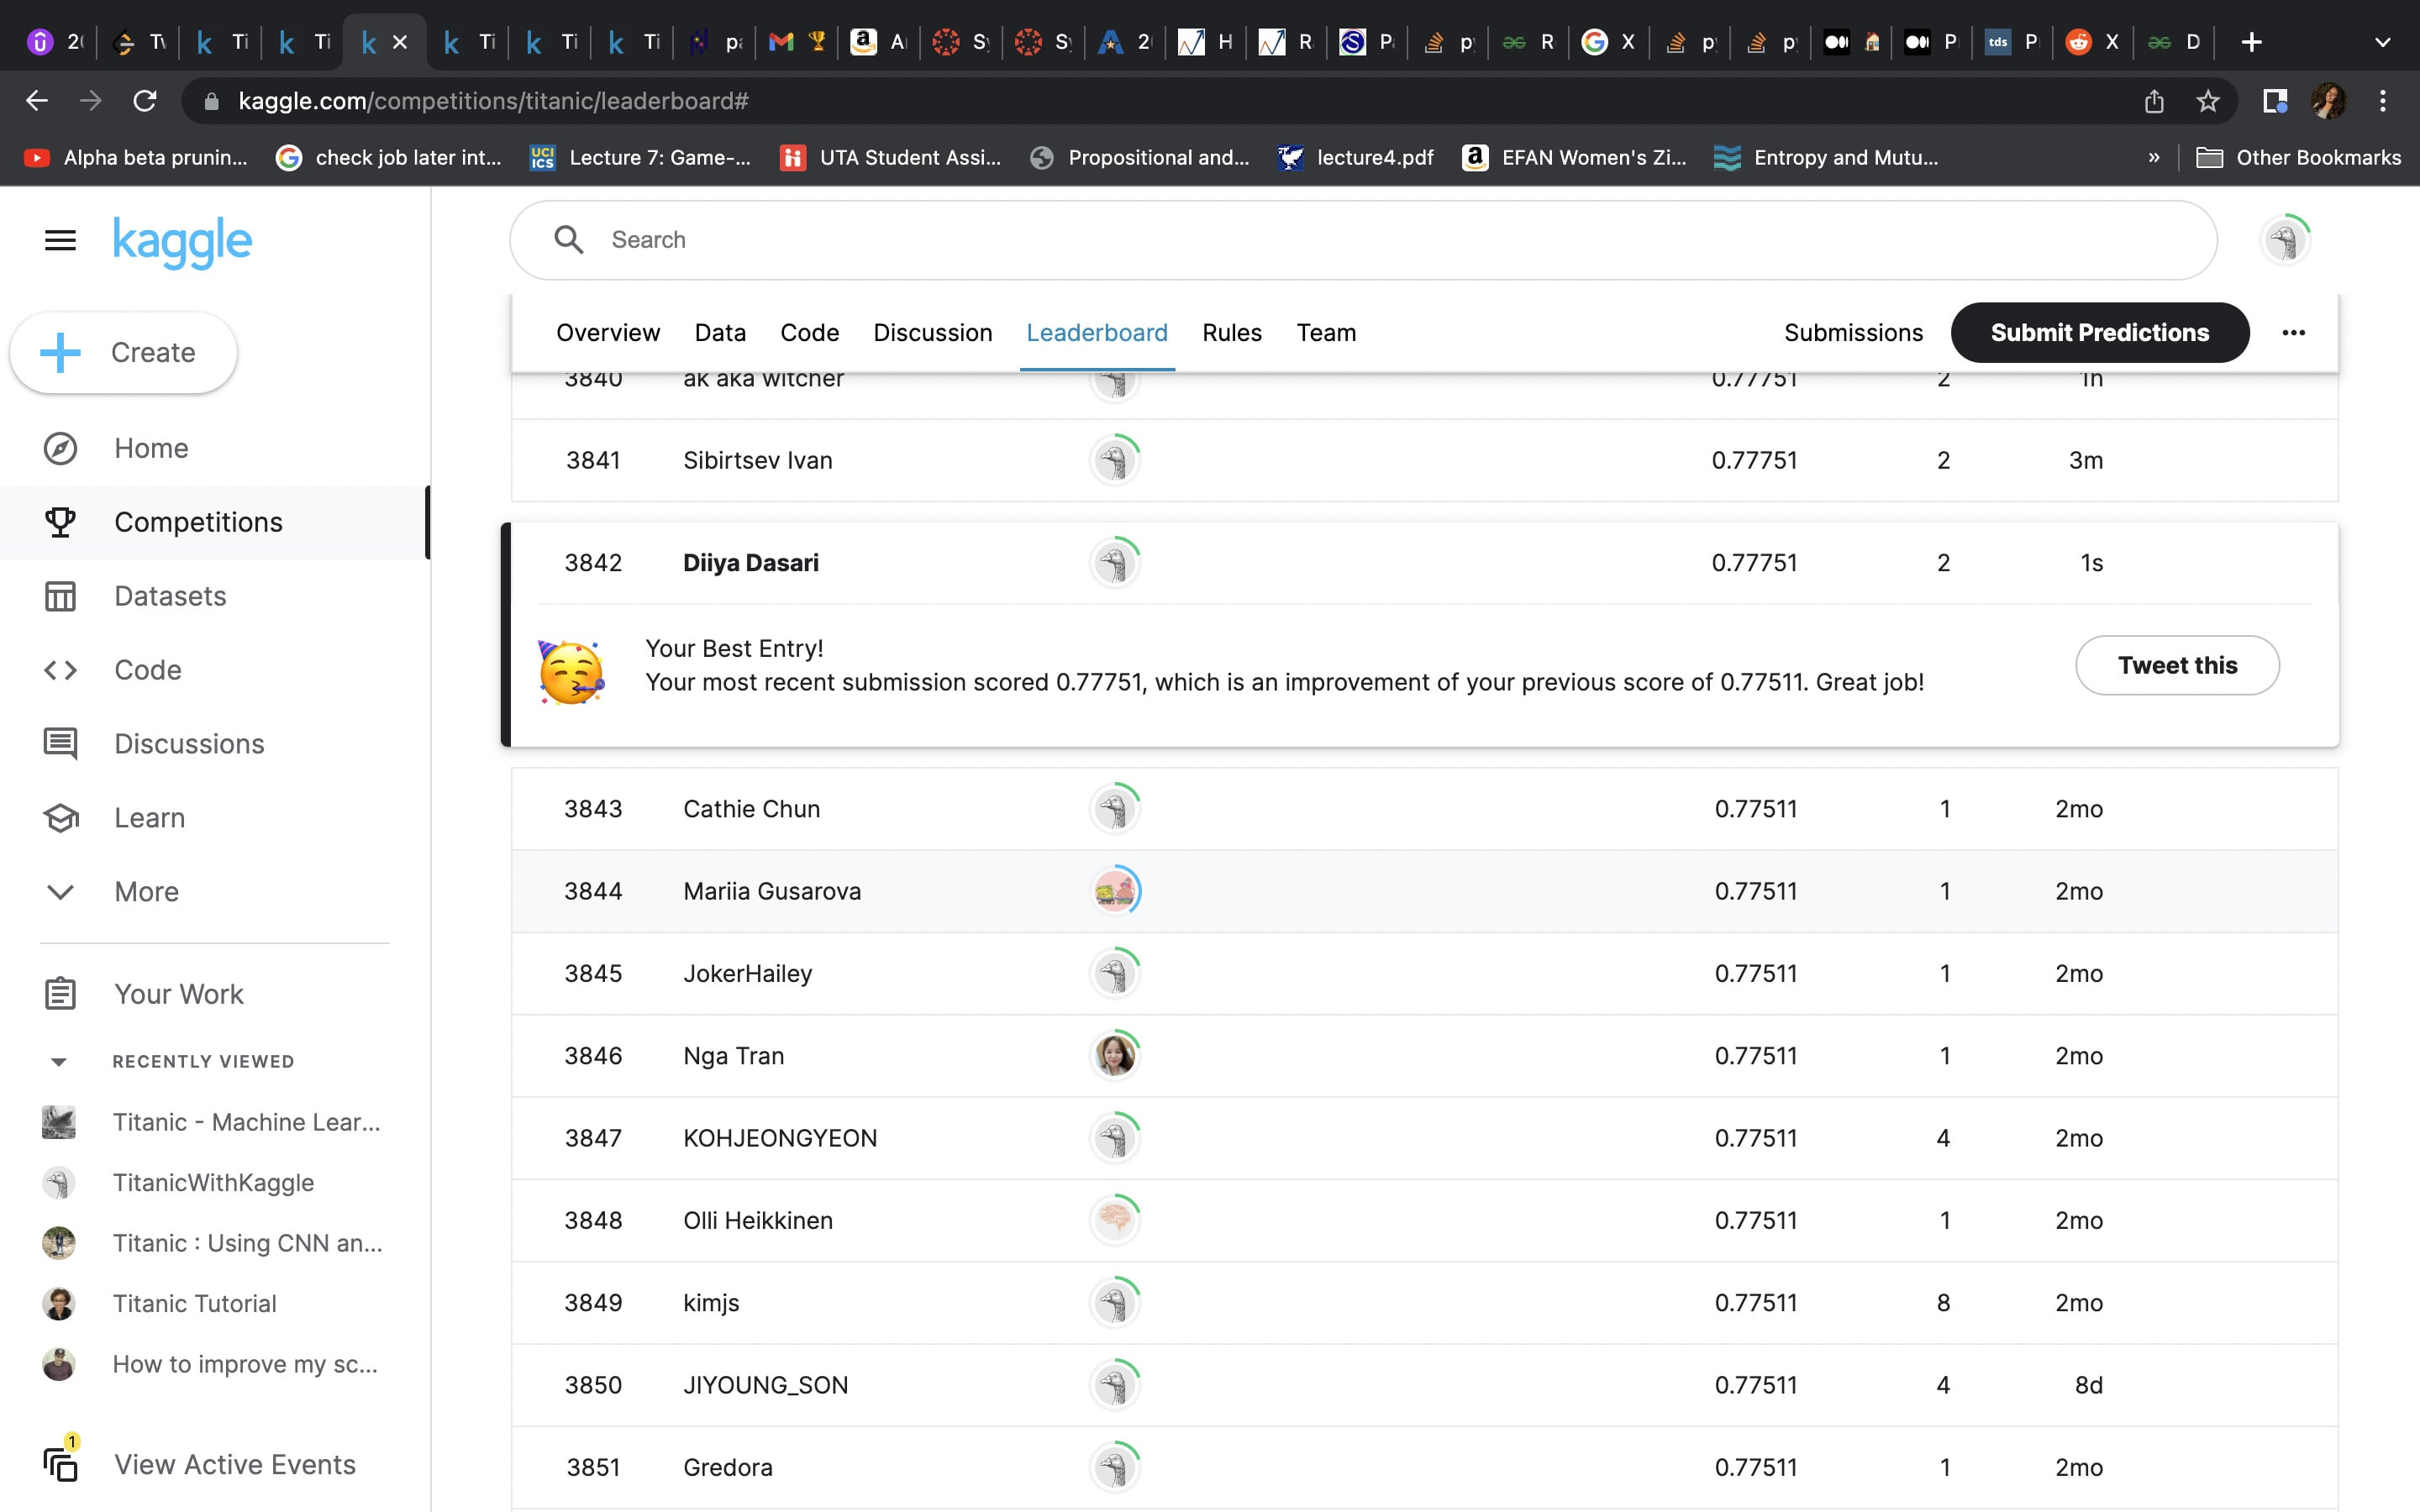

Logistic regression :


In [9]:
train_data.replace({'Sex': {'male':0, 'female': 1}}, inplace=True)
test_data.replace({'Sex': {'male':0, 'female': 1}}, inplace=True)

In [10]:
avg_age = train_data['Age'].mean()
train_data['Age'].fillna(value= avg_age, inplace=True)
test_data['Age'].fillna(value=avg_age, inplace= True)

In [11]:
train_feature = train_data[["Pclass", "Sex", "SibSp", "Parch", "Age"]]
train_label = train_data['Survived']
test_feature = test_data[["Pclass", "Sex", "SibSp", "Parch", "Age"]]

In [12]:
scale = StandardScaler()
train_feature = scale.fit_transform(train_feature)
test_feature = scale.fit_transform(test_feature)

In [13]:
model = LogisticRegression()

model.fit(train_feature, train_label)

predicted_test_labels = model.predict(test_feature)

In [14]:
trained_score = model.score(train_feature, train_label)
trained_score

0.7901234567901234

In [15]:
labels = pd.read_csv('../input/titanic/gender_submission.csv')['Survived']
test_score = model.score(test_feature,labels)
test_score

0.9354066985645934

In [17]:
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predicted_test_labels.astype(int)})
output.to_csv('submission3.csv', index=False)